In [1]:
import numpy as np
import pandas as pd
from hmmlearn import hmm

In [2]:
# No need to add anything to filepath if the csv files are in the same folder.
# If the csv files are in different folders, then add the path to the files

path = ""

data = pd.read_csv(path + "FakeMonitorData1.csv")
emissionmeans = pd.read_csv(path + "FakeMonitorEmissionMeans1.csv")
emissionSD1 = pd.read_csv(path + "FakeMonitorEmissionSDs1_1.csv")
emissionSD2 = pd.read_csv(path + "FakeMonitorEmissionSDs1_2.csv")
emissionSD3 = pd.read_csv(path + "FakeMonitorEmissionSDs1_3.csv")
hiddenstates = pd.read_csv(path + "FakeMonitorHiddenStates1.csv")
transitionprobs = pd.read_csv(path + "FakeMonitorTransProbs1.csv")

In [3]:
data

,V1
0,103.445919
1,102.434281
2,107.651148
3,56.939232
4,1.103349
...,...
995,105.553783
996,107.304609
997,107.630422
998,107.812075


In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.5)

In [5]:
remodel = hmm.GaussianHMM(n_components=3, n_iter=1000)

# remodel.startprob_ = np.array([1,0,0])

# remodel.transmatrix_ = np.array(transitionprobs)

# remodel.means_ = np.array(emissionmeans)

remodel.fit(train)
Z2 = remodel.predict(test)

In [6]:
Z2

array([2, 1, 2, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 2, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 1,
       1, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 0, 2, 2, 1, 2, 0, 1, 0, 2, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1,
       0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0,
       0, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 2, 2, 0,
       0, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1,
       2, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 2, 0,
       1, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1,

In [10]:
def assign_hidden_states(result):
    if result == 1:
        return 1
    if result == 2:
        return 2
    if result == 0:
        return 3
    
hidden_state_predictions = pd.Series(Z2).apply(lambda x: assign_hidden_states(x))

In [11]:
teststates = hiddenstates.loc[list(test.index)].reset_index()["x"]

In [12]:
correct = teststates == hidden_state_predictions
print("Accuracy: " + str(sum(correct)/len(hidden_state_predictions)*100) + "%")
correct.head()

Accuracy: 99.8%


0    False
1     True
2     True
3     True
4     True
dtype: bool

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(teststates, hidden_state_predictions)

array([[186,   1,   0],
       [  0, 162,   0],
       [  0,   0, 151]], dtype=int64)

<AxesSubplot:>

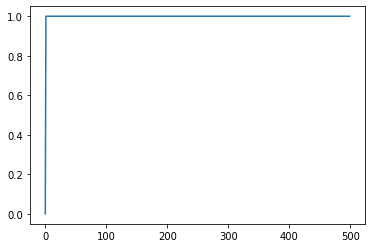

In [14]:
import matplotlib.pyplot as plt
correct = correct.astype(int)
correct.plot()
# correct.plot(teststates == 1, color = "blue")
# correct.plot(teststates == 2, color = "red")
# correct.plot(teststates == 3, color = "green")

In [15]:
trainstates = hiddenstates.loc[list(train.index)].reset_index()["x"]
train = train.reset_index()["V1"]
test = test.reset_index()["V1"]

In [16]:
train
trainstates

0      3
1      3
2      2
3      1
4      1
      ..
495    1
496    3
497    3
498    1
499    2
Name: x, Length: 500, dtype: int64

In [17]:
import statistics as stat

def means_and_sds(data, hiddenstates):
    state1vals = []
    state2vals = []
    state3vals = []
    for i in range(len(hiddenstates)):
        if hiddenstates[i] == 1:
            state1vals.append(data[i])
        elif hiddenstates[i] == 2:
            state2vals.append(data[i])
        elif hiddenstates[i] == 3:
            state3vals.append(data[i])
    mean1 = stat.mean(state1vals)
    mean2 = stat.mean(state2vals)
    mean3 = stat.mean(state3vals)
    sd1 = stat.stdev(state1vals)
    sd2 = stat.stdev(state2vals)
    sd3 = stat.stdev(state3vals)
    return ([mean1, mean2, mean3], [sd1, sd2, sd3])

predmeans, predsds = means_and_sds(train, trainstates)

In [18]:
predmeans

[5.000271212147977, 55.139004242254714, 104.90105882575313]

In [19]:
predsds

[2.82577686181301, 2.641218411177337, 2.2808144405502326]